In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("mnist_train_small.csv")

In [3]:
print(data)

      Unnamed: 0  5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  ...  0.608  0.609  \
0              0  0  0    0    0    0    0    0    0    0  ...      0      0   
1              1  4  0    0    0    0    0    0    0    0  ...      0      0   
2              2  1  0    0    0    0    0    0    0    0  ...      0      0   
3              3  9  0    0    0    0    0    0    0    0  ...      0      0   
4              4  2  0    0    0    0    0    0    0    0  ...      0      0   
5              5  1  0    0    0    0    0    0    0    0  ...      0      0   
6              6  3  0    0    0    0    0    0    0    0  ...      0      0   
7              7  1  0    0    0    0    0    0    0    0  ...      0      0   
8              8  4  0    0    0    0    0    0    0    0  ...      0      0   
9              9  3  0    0    0    0    0    0    0    0  ...      0      0   
10            10  5  0    0    0    0    0    0    0    0  ...      0      0   
11            11  3  0    0    0    0   

In [4]:
type(data)

pandas.core.frame.DataFrame

# Converting data into numpy array

In [5]:
num=data.values

In [6]:
type(num)

numpy.ndarray

In [7]:
print(num)

[[   0    0    0 ...    0    0    0]
 [   1    4    0 ...    0    0    0]
 [   2    1    0 ...    0    0    0]
 ...
 [7997    5    0 ...    0    0    0]
 [7998    4    0 ...    0    0    0]
 [7999    0    0 ...    0    0    0]]


In [8]:
X=num[:,2:]
y=num[:, 1]

In [9]:
img=X[3].reshape(28,28)

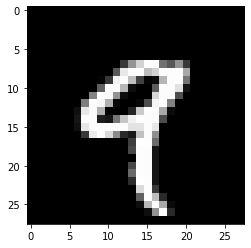

In [10]:
plt.imshow(img, cmap="gray")

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
class KNN:
    def __init__(self,k):
        self.k=k
        self.X=None
        self.y=None
        
    def fit(self,X,y):
        self.X=X
        self.y=y
        
    def predict_point(self,point):
        distances=[]
        for x_item, y_item in zip(self.X,self.y):
            dis=KNN.distance(x_item,point)
            distances.append((dis, y_item))
            
        distances=sorted(distances)
        top=np.array(distances[:self.k])
        
        vals,counts=np.unique(top[:, 1], return_counts=True)
        return vals[np.argmax(counts)]
    def predict(self, X):
        res=[]
        for point in X:
            v=self.predict_point(point)
            res.append(v)
        return np.array(res, dtype=int)
    
    def score(self, X, y):
        return sum(self.predict(X)==y)/len(y)
    
    @classmethod
    def distance(cls, p1, p2):
        return np.sum((p1-p2)**2)

In [13]:
model=KNN(10)

In [14]:
model.fit(X_train,y_train)

In [15]:
model.predict(X_test[:10])

array([9, 1, 4, 8, 0, 8, 2, 2, 4, 0])

In [ ]:
model.score(X_test, y_test)